In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the Netflix dataset
df = pd.read_csv('../Team1_Assignment4/netflix.csv')

# split the "listed_in" column into separate columns
df[['cat1', 'cat2', 'cat3']] = df['listed_in'].str.split(',', n=2, expand=True)

# define the main categories based on cat1
categories = {
    'TV Shows': ['Crime TV Shows', 'International TV Shows', 'Kids\' TV', 'Romantic TV Shows', 'TV Action & Adventure',
                 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'Reality TV',
                 'Spanish-Language TV Shows', 'Classic & Cult TV', 'Docuseries', 'Science & Nature TV', 'Stand-Up Comedy & Talk Shows', 'TV Thrillers'],
    'Movies': ['Action & Adventure', 'Anime Features', 'Classic Movies', 'Comedies', 'Documentaries', 'Dramas',
               'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'LGBTQ Movies',
               'Music & Musicals', 'Romantic Movies', 'Sci-Fi & Fantasy', 'Sports Movies', 'Thrillers'],
    'Documentaries': ['Crime Documentaries', 'Documentaries', 'Science & Nature Documentaries']
}

# group the subcategories based on the main categories
subcategories = {}
for cat in categories:
    subcategories[cat] = {}
    for subcat in categories[cat]:
        subcategories[cat][subcat] = list(df.loc[df['cat1'] == subcat, 'cat2'].unique())

# group the sub-subcategories based on the subcategories
subsubcategories = {}
for cat in subcategories:
    subsubcategories[cat] = {}
    for subcat in subcategories[cat]:
        subsubcategories[cat][subcat] = {}
        for subsubcat in subcategories[cat][subcat]:
            subsubcategories[cat][subcat][subsubcat] = list(df.loc[(df['cat1'] == subcat) & (df['cat2'] == subsubcat), 'cat3'].unique())

# print the categories and subcategories
print(categories)
print(subcategories)
print(subsubcategories)

{'TV Shows': ['Crime TV Shows', 'International TV Shows', "Kids' TV", 'Romantic TV Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'Reality TV', 'Spanish-Language TV Shows', 'Classic & Cult TV', 'Docuseries', 'Science & Nature TV', 'Stand-Up Comedy & Talk Shows', 'TV Thrillers'], 'Movies': ['Action & Adventure', 'Anime Features', 'Classic Movies', 'Comedies', 'Documentaries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'LGBTQ Movies', 'Music & Musicals', 'Romantic Movies', 'Sci-Fi & Fantasy', 'Sports Movies', 'Thrillers'], 'Documentaries': ['Crime Documentaries', 'Documentaries', 'Science & Nature Documentaries']}
{'TV Shows': {'Crime TV Shows': [' International TV Shows', ' Docuseries', ' TV Dramas', " Kids' TV", ' TV Action & Adventure', ' Spanish-Language TV Shows', ' Romantic TV Shows', ' TV Comedies', ' TV Horror'], 'International TV Shows': [' Spanish-Language TV 

In [3]:
# read the Netflix dataset
df = pd.read_csv('../Team1_Assignment4/netflix.csv')

# split the "listed_in" column into separate columns
df[['cat1', 'cat2', 'cat3']] = df['listed_in'].str.split(',', n=2, expand=True)

# define the main categories based on cat1
categories = {
    'TV Shows': ['Crime TV Shows', 'International TV Shows', 'Kids\' TV', 'Romantic TV Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'Reality TV',                 'Spanish-Language TV Shows', 'Classic & Cult TV', 'Docuseries', 'Science & Nature TV', 'Stand-Up Comedy & Talk Shows', 'TV Thrillers'],
    'Movies': ['Action & Adventure', 'Anime Features', 'Classic Movies', 'Comedies', 'Documentaries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'LGBTQ Movies',               'Music & Musicals', 'Romantic Movies', 'Sci-Fi & Fantasy', 'Sports Movies', 'Thrillers'],
    'Documentaries': ['Crime Documentaries', 'Documentaries', 'Science & Nature Documentaries']
}

# group the subcategories based on the main categories
subcategories = {}
for cat in categories:
    subcategories[cat] = {}
    for subcat in categories[cat]:
        subcategories[cat][subcat] = list(df.loc[df['cat1'] == subcat, 'cat2'].dropna().unique())

# group the sub-subcategories based on the subcategories
subsubcategories = {}
for cat in subcategories:
    subsubcategories[cat] = {}
    for subcat in subcategories[cat]:
        subsubcategories[cat][subcat] = {}
        for subsubcat in subcategories[cat][subcat]:
            subsubcategories[cat][subcat][subsubcat] = list(df.loc[(df['cat1'] == subcat) & (df['cat2'] == subsubcat), 'cat3'].dropna().unique())

# drop the "listed_in" column
df.drop('listed_in', axis=1, inplace=True)

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,cat1,cat2,cat3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,Children & Family Movies,Comedies,None
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,Dramas,Independent Movies,International Movies


In [5]:
df.to_csv('../Team1_Assignment4/netflix_cat.csv', index=False)

In [6]:
# define colors for each category, subcategory, and subsubcategory
category_colors = {'TV Shows': 'tab:blue', 'Movies': 'tab:green', 'Documentaries': 'tab:red'}

subcategory_colors = {}
for cat in subcategories:
    subcat_colors = {}
    for subcat in subcategories[cat]:
        subcat_colors[subcat] = category_colors[cat]
    subcategory_colors[cat] = subcat_colors

subsubcategory_colors = {}
for cat in subsubcategories:
    subcat_colors = {}
    for subcat in subsubcategories[cat]:
        subsubcat_colors = {}
        for subsubcat in subsubcategories[cat][subcat]:
            subsubcat_colors[subsubcat] = subcategory_colors[cat][subcat]
        subcat_colors[subcat] = subsubcat_colors
    subsubcategory_colors[cat] = subcat_colors

/var/folders/wk/p8nptcpx295dds9jj90cs6vm0000gn/T/ipykernel_54961/2560006361.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'category': cat, 'count': len(df.loc[df['cat1'].isin(categories[cat])])}, ignore_index=True)
/var/folders/wk/p8nptcpx295dds9jj90cs6vm0000gn/T/ipykernel_54961/2560006361.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'category': cat, 'subcategory': subcat, 'count': len(df.loc[(df['cat1'] == subcat) & (df['cat2'].isin(subcategories[cat][subcat]))])}, ignore_index=True)
/var/folders/wk/p8nptcpx295dds9jj90cs6vm0000gn/T/ipykernel_54961/2560006361.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'category': cat, 

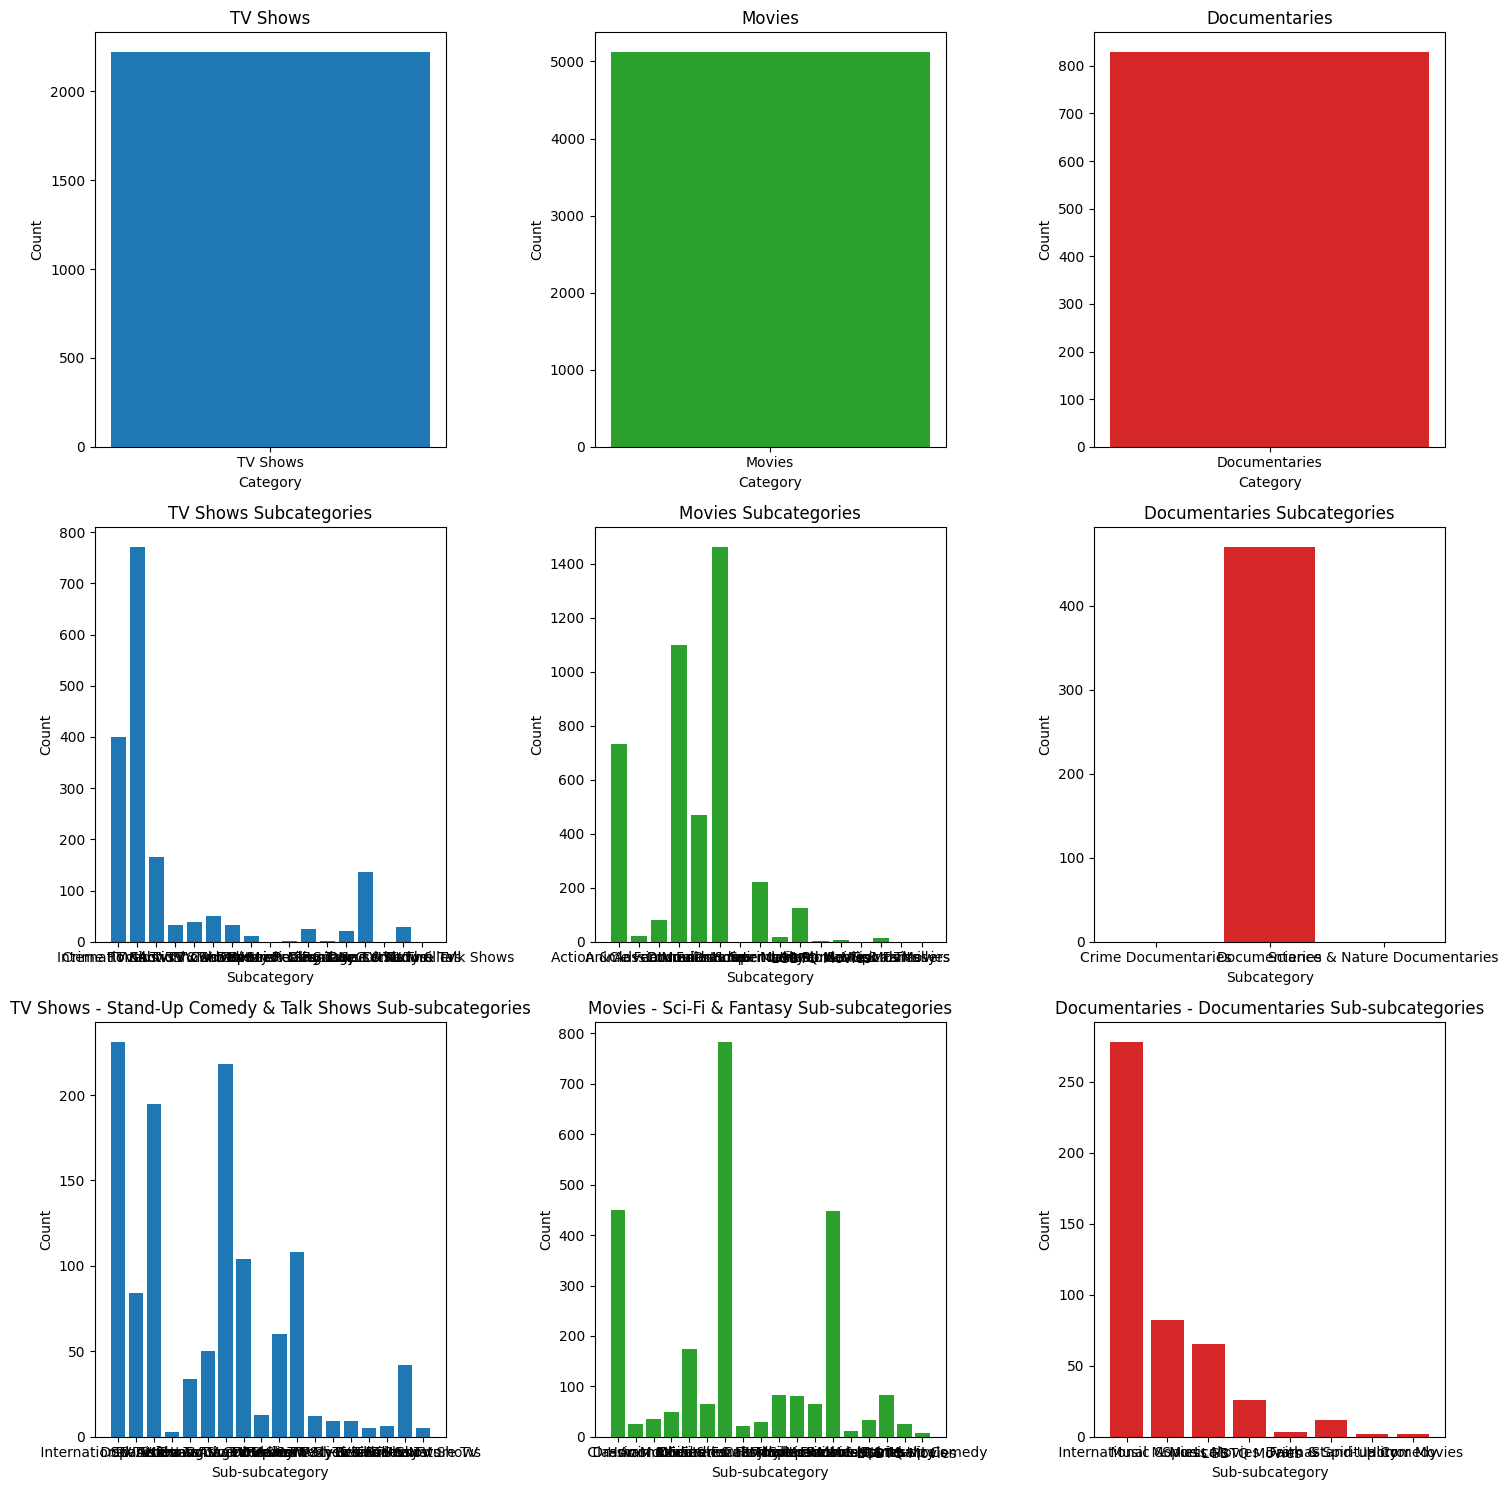

In [7]:
# create a dataframe to store the counts
count_df = pd.DataFrame(columns=['category', 'subcategory', 'subsubcategory', 'count'])

# count the number of titles in each category, subcategory, and sub-subcategory
for cat in categories:
    count_df = count_df.append({'category': cat, 'count': len(df.loc[df['cat1'].isin(categories[cat])])}, ignore_index=True)
    
    for subcat in subcategories[cat]:
        count_df = count_df.append({'category': cat, 'subcategory': subcat, 'count': len(df.loc[(df['cat1'] == subcat) & (df['cat2'].isin(subcategories[cat][subcat]))])}, ignore_index=True)
        
        for subsubcat in subsubcategories[cat][subcat]:
            if subsubcat == "None":
                continue
            count_df = count_df.append({'category': cat, 'subcategory': subcat, 'subsubcategory': subsubcat, 'count': len(df.loc[(df['cat1'] == subcat) & (df['cat2'] == subsubcat)])}, ignore_index=True)

# define colors for each category, subcategory, and subsubcategory
category_colors = {'TV Shows': 'tab:blue', 'Movies': 'tab:green', 'Documentaries': 'tab:red'}

subcategory_colors = {}
for cat in subcategories:
    subcat_colors = {}
    for subcat in subcategories[cat]:
        subcat_colors[subcat] = category_colors[cat]
    subcategory_colors[cat] = subcat_colors

subsubcategory_colors = {}
for cat in subsubcategories:
    subcat_colors = {}
    for subcat in subsubcategories[cat]:
        subsubcat_colors = {}
        for subsubcat in subsubcategories[cat][subcat]:
            subsubcat_colors[subsubcat] = subcategory_colors[cat][subcat]
        subcat_colors[subcat] = subsubcat_colors
    subsubcategory_colors[cat] = subcat_colors

for cat in subsubcategories:
    for subcat in subsubcategories[cat]:
        for subsubcat in subsubcategories[cat][subcat]:
            if subsubcat == "None":
                continue
            if count_df.loc[(count_df['category'] == cat) & (count_df['subcategory'] == subcat) & (count_df['subsubcategory'] == subsubcat)].empty:
                print(f'Missing row: {cat} - {subcat} - {subsubcat}')

# create a figure with subplots for each category
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# plot the main categories as a bar chart
for i, cat in enumerate(categories):
    cat_counts = count_df.loc[(count_df['category'] == cat) & (count_df['subcategory'].isnull()) & (count_df['subsubcategory'].isnull()), 'count'].values[0]
    axs[0, i].bar(cat, cat_counts, color=category_colors[cat])
    axs[0, i].set_title(cat)
    axs[0, i].set_xlabel('Category')
    axs[0, i].set_ylabel('Count')

# plot the subcategories as a bar chart
for i, cat in enumerate(subcategories):
    for j, subcat in enumerate(subcategories[cat]):
        if subcat is None:
            continue
        subcat_counts = count_df.loc[(count_df['category'] == cat) & (count_df['subcategory'] == subcat) & (count_df['subsubcategory'].isnull()), 'count'].values[0]
        axs[1, i].bar(subcat, subcat_counts, color=subcategory_colors[cat][subcat])
        axs[1, i].set_title(f'{cat} Subcategories')
        axs[1, i].set_xlabel('Subcategory')
        axs[1, i].set_ylabel('Count')

# plot the sub-subcategories as a bar chart
for i, cat in enumerate(subsubcategories):
    for j, subcat in enumerate(subsubcategories[cat]):
        for k, subsubcat in enumerate(subsubcategories[cat][subcat]):
            if subsubcat is None:
                continue
            subsubcat_counts = count_df.loc[(count_df['category'] == cat) & (count_df['subcategory'] == subcat) & (count_df['subsubcategory'] == subsubcat), 'count'].values[0]
            axs[2, i].bar(subsubcat, subsubcat_counts, color=subsubcategory_colors[cat][subcat][subsubcat])
            axs[2, i].set_title(f'{cat} - {subcat} Sub-subcategories')
            axs[2, i].set_xlabel('Sub-subcategory')
            axs[2, i].set_ylabel('Count')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()